## What's in my collection?

A collective and very preliminary notebook testing ideas around collection EDA (Belval, 30.10.2024)

In [1]:
from impresso import connect

impresso_session = connect()

🎉 You are now connected to the Impresso API!  🎉


In [45]:
from datetime import date, datetime
import pandas as pd

In [2]:
from impresso import DateRange, OR

In [26]:
search_results = impresso_session.search.find(
    q="paix",
    order_by="date",
    newspaper_id=OR("GDL", "JDG", "EXP"),
    date_range=DateRange("1915-01-01", "1919-12-31"),
    limit=3000
)
search_results

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JDG-1915-01-01-a-i0020,ar,[REDACTED],1237,1,"[{'uid': 'JDG-1915-01-01-a-p0002', 'num': 2, '...",True,[REDACTED],[article],OpenPrivate,1915,"[{'uid': 'aida-0001-54-France', 'relevance': 1...",[],fr,[],[],[],[],False,1915-01-01T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.069, 'topic': {'uid': 'tm-fr-...",[],JDG-1915-01-01-a,,[issue],False,OpenPrivate,1915-01-01T00:00:00+00:00,1915,JDG,JDG,[newspaper],[],True,Journal de Genève,1998,1826,3673264,49180,495926,172,[],JDG-1826-01-01-a,,[issue],False,NotDefined,1826-01-01T00:00:00+00:00,1826,JDG-1998-02-28-a,,[issue],False,NotDefined,1998-02-28T00:00:00+00:00,1998,True
GDL-1915-01-02-a-i0016,ar,[REDACTED],473,1,"[{'uid': 'GDL-1915-01-02-a-p0002', 'num': 2, '...",True,[REDACTED],[article],OpenPrivate,1915,"[{'uid': 'aida-0001-54-Berlin', 'relevance': 1...",[],fr,[],[],[],[],False,1915-01-02T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.031, 'topic': {'uid': 'tm-fr-...",[],GDL-1915-01-02-a,,[issue],False,OpenPrivate,1915-01-02T00:00:00+00:00,1915,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991,1804,4360036,51062,441517,187,[],GDL-1798-02-01-a,,[issue],False,NotDefined,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,NotDefined,1998-02-28T00:00:00+00:00,1998,True
GDL-1915-01-02-a-i0013,ar,[REDACTED],279,1,"[{'uid': 'GDL-1915-01-02-a-p0002', 'num': 2, '...",True,[REDACTED],[article],OpenPrivate,1915,"[{'uid': 'aida-0001-54-Paris', 'relevance': 2}...",[],fr,[],[],[],[],False,1915-01-02T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.023, 'topic': {'uid': 'tm-fr-...",[],GDL-1915-01-02-a,,[issue],False,OpenPrivate,1915-01-02T00:00:00+00:00,1915,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991,1804,4360036,51062,441517,187,[],GDL-1798-02-01-a,,[issue],False,NotDefined,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,NotDefined,1998-02-28T00:00:00+00:00,1998,True


In [59]:
meta_result = impresso_session.search.find(
    q="paix",
    order_by="date",
    newspaper_id=OR("GDL", "JDG", "EXP"),
    date_range=DateRange("1915-01-01", "1917-12-31"),
    limit=1
)

total_items = meta_result.total
print(f'Total items: {total_items}')

has_more_items = True

page_size = 100
offset = 0
pages = []

while has_more_items:
  print(f"getting page with offset {offset}")
  page = impresso_session.search.find(q="paix",
    order_by="date",
    newspaper_id=OR("GDL", "JDG", "EXP"),
    date_range=DateRange("1915-01-01", "1917-12-31"),
    limit=page_size, offset=offset)
  print(f'Got page with {page.size} items')
  offset += page_size
  if page.size == 0:
    has_more_items = False
  
  pages.append(page.df)

all_results = pd.concat(pages)
len(all_results)

Total items: 9687
getting page with offset 0
Got page with 100 items
getting page with offset 100
Got page with 100 items
getting page with offset 200
Got page with 100 items
getting page with offset 300
Got page with 100 items
getting page with offset 400
Got page with 100 items
getting page with offset 500
Got page with 100 items
getting page with offset 600
Got page with 100 items
getting page with offset 700
Got page with 100 items
getting page with offset 800
Got page with 100 items
getting page with offset 900
Got page with 100 items
getting page with offset 1000
Got page with 100 items
getting page with offset 1100
Got page with 100 items
getting page with offset 1200
Got page with 100 items
getting page with offset 1300
Got page with 100 items
getting page with offset 1400
Got page with 100 items
getting page with offset 1500
Got page with 100 items
getting page with offset 1600
Got page with 100 items
getting page with offset 1700
Got page with 100 items
getting page with offs

9687

### Visualise the distribution of content items over time per newspaper title

In [10]:
search_results.df.columns

Index(['type', 'title', 'size', 'nbPages', 'pages', 'isCC', 'excerpt',
       'labels', 'accessRight', 'year', 'locations', 'persons', 'language',
       'matches', 'regions', 'regionBreaks', 'contentLineBreaks', 'isFront',
       'date', 'country', 'tags', 'collections', 'dataProvider', 'topics',
       'mentions', 'issue.uid', 'issue.cover', 'issue.labels', 'issue.fresh',
       'issue.accessRights', 'issue.date', 'issue.year', 'newspaper.uid',
       'newspaper.acronym', 'newspaper.labels', 'newspaper.languages',
       'newspaper.included', 'newspaper.name', 'newspaper.endYear',
       'newspaper.startYear', 'newspaper.countArticles',
       'newspaper.countIssues', 'newspaper.countPages', 'newspaper.deltaYear',
       'newspaper.properties', 'newspaper.firstIssue.uid',
       'newspaper.firstIssue.cover', 'newspaper.firstIssue.labels',
       'newspaper.firstIssue.fresh', 'newspaper.firstIssue.accessRights',
       'newspaper.firstIssue.date', 'newspaper.firstIssue.year',
       '

In [60]:
np_view = all_results[["newspaper.uid", "issue.date"]]

In [61]:
np_view.describe()

,newspaper.uid,issue.date
count,9687,9687
unique,3,1089
top,GDL,1916-12-29T00:00:00+00:00
freq,4761,37


In [62]:
min_date, max_date = np_view['issue.date'].min(), np_view['issue.date'].max()
min_date, max_date

('1915-01-01T00:00:00+00:00', '1917-12-31T00:00:00+00:00')

In [63]:
d1 = datetime.strptime(min_date.split('T')[0], "%Y-%m-%d").date()
d2 = datetime.strptime(max_date.split('T')[0], "%Y-%m-%d").date()

nbins= (d2-d1).days

In [4]:
import plotly.express as px

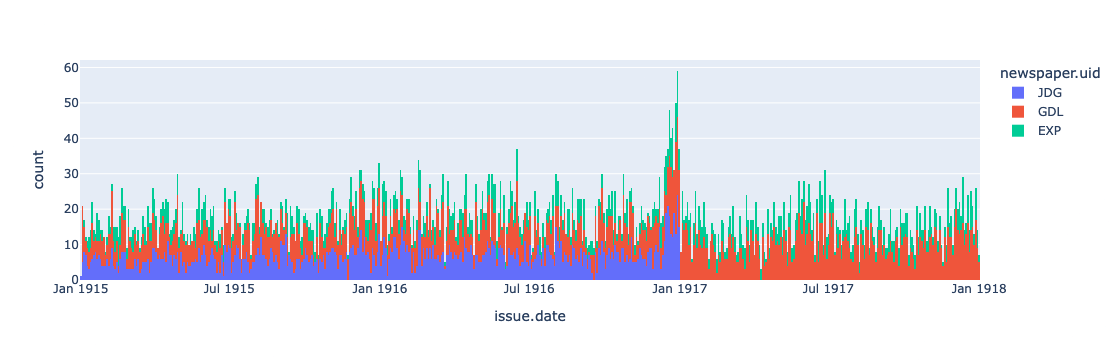

In [64]:
fig = px.histogram(np_view, x="issue.date", color="newspaper.uid", nbins=nbins)
fig.show()

In [86]:
type(np_view)

pandas.core.frame.DataFrame

In [87]:
np_view= np_view.drop('counts', axis=1)

In [90]:
np_view['counts'] = np_view.groupby(['newspaper.uid', 'issue.date']).transform('count')
np_view

,newspaper.uid,issue.date,counts
uid,,,
JDG-1915-01-01-a-i0020,JDG,1915-01-01T00:00:00+00:00,1
GDL-1915-01-02-a-i0016,GDL,1915-01-02T00:00:00+00:00,9
GDL-1915-01-02-a-i0013,GDL,1915-01-02T00:00:00+00:00,9
GDL-1915-01-02-a-i0078,GDL,1915-01-02T00:00:00+00:00,9
GDL-1915-01-02-a-i0065,GDL,1915-01-02T00:00:00+00:00,9
...,...,...,...
GDL-1917-12-31-a-i0018,GDL,1917-12-31T00:00:00+00:00,5
EXP-1917-12-31-a-i0055,EXP,1917-12-31T00:00:00+00:00,2
GDL-1917-12-31-a-i0080,GDL,1917-12-31T00:00:00+00:00,5


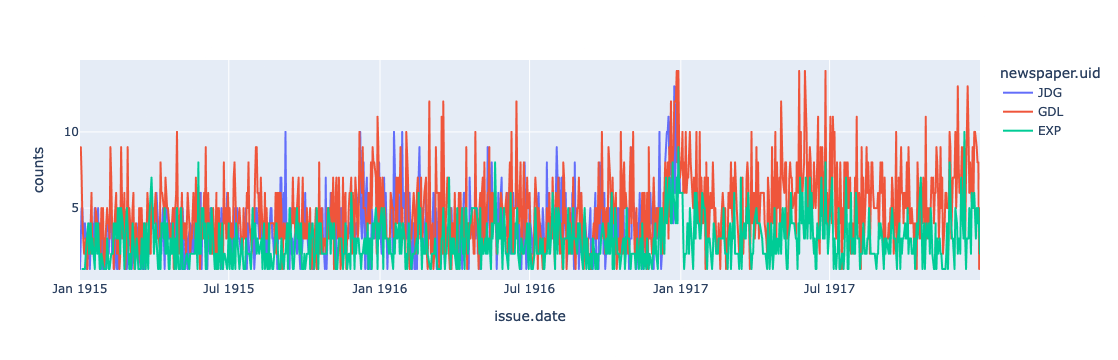

In [91]:
fig = px.line(np_view, x="issue.date", y='counts', color="newspaper.uid")
fig.show()

### Visualise the distribution of topics

In [36]:
topic_view = search_results.df[["newspaper.uid", "issue.date", "topics"]]